In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [3]:
from bing_image_downloader import downloader
downloader.download("lions",limit=60,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/lions


[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-WeQqykyLQJE/UOFwCsUW4JI/AAAAAAAAEmY/aPSDjWS111E/s1600/African-Lion.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://s24990.pcdn.co/wp-content/uploads/2015/12/Lion_1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images.yuku.com/image/jpeg/8cb15cf9e17bb327e7a944593c6d7d800013cc6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://3.bp.blogspot.com/-a8xW6J4LB2M/TghXq9k3DCI/AAAAAAAAAMs/LnI11Rcc70Q/s1600/African+Lion3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i104.photobucket.com/albums/m168/coastwizard/Cryptozoology/Lions of Tsavo/charging_lion3.jpg
[!] Issue getting: https://i104.photobucket.com/albums/m168/coastwizard/Cryptozoology/Lions of Tsavo/charging_lion3.jpg
[!] Error:: URL can't contain control characters. '/albums/m168/coastwizard/Cryptozoology/Lions 

In [4]:
from bing_image_downloader import downloader
downloader.download("cars",limit=60,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/cars


[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/73/62/d8/7362d822038afc4386906ce9ab2ce58c.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://media.whatcar.com/migration/article_inline/fa3f2b3925370291872ddcf823dd8719749dcae6.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://media.whatcar.com/migration/article_inline/992febfeab10d474005c3c45d112d723bcbbae66.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://shinecoco.com/wp-content/uploads/2020/04/gear_ghouly.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://external-preview.redd.it/pbEfLIYe90hFmJFBXWG8K0oXU4ayUl-6-USZlF7G_qk.jpg?auto=webp&amp;s=b2d9b17a5a84826506058e26ddbaeead84d0761a
[!] Issue getting: https://extern

In [5]:
from bing_image_downloader import downloader
downloader.download("ducks",limit=60,output_dir='images',adult_filter_off=True)

[%] Downloading Images to /content/images/ducks


[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-ogkSpbuCps4/TWG3DGdHkWI/AAAAAAAAA8M/UNBClDd1yLE/s1600/white-duck-water.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://whyevolutionistrue.com/wp-content/uploads/2018/03/p1150068.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://whyevolutionistrue.com/wp-content/uploads/2021/01/P1020719-2048x1536.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.waterfowl.org.uk/wpnew/wp-content/uploads/2019/09/Redhead-thumb-1024x1024.png
[%] File Downloaded !

[%] Downloading Image #5 from https://www.waterfowl.org.uk/wpnew/wp-content/uploads/2019/11/Flying-Steamerduck-thumb-AL-1024x1024.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/fd/43/cf/fd43cf371f097149701739127afa4d15.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i0.wp.com/www

In [6]:
!pip install ipython-autotime
%load_ext autotime

time: 448 µs (started: 2021-06-24 15:30:11 +00:00)


In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np 
from skimage.io import imread
from skimage.transform import resize
target=[]
images=[]
flat_data=[]
DATADIR='/content/images'
CATEGORIES=['lions','cars','ducks']
for category in CATEGORIES:
  class_num=CATEGORIES.index(category)
  path=os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    #plt.imshow(img_array)
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

time: 56.2 s (started: 2021-06-24 15:30:53 +00:00)


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)

time: 266 ms (started: 2021-06-24 15:32:12 +00:00)


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 50s (started: 2021-06-24 15:32:23 +00:00)


In [10]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       0, 2, 2, 1, 1, 0, 1, 2, 0, 1])

time: 558 ms (started: 2021-06-24 15:38:34 +00:00)


In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.07 ms (started: 2021-06-24 15:38:53 +00:00)


In [12]:
accuracy_score(y_pred,y_test)

0.6481481481481481

time: 5.8 ms (started: 2021-06-24 15:39:02 +00:00)


In [13]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

time: 78.8 ms (started: 2021-06-24 15:39:28 +00:00)


In [14]:
model=pickle.load(open('img_model.p','rb'))

time: 35.1 ms (started: 2021-06-24 15:39:37 +00:00)


enter your urlhttps://cars.tatamotors.com/images/tiago-mobile-banner-homepg.jpg
(1085, 1080, 3)
PREDICTED OUTPUT:cars


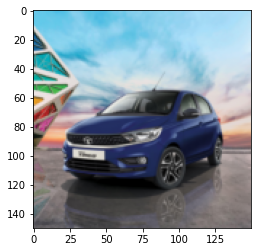

time: 9.61 s (started: 2021-06-24 15:39:46 +00:00)


In [15]:
flat_data=[]
url=input('enter your url')
img = imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')